In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

In [3]:
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

In [4]:
kernel = tf.constant([[1,1,1],[-1,-8,-1],[-1,-1,-1],])

In [5]:
image = tf.io.read_file(r"C:\Users\Lenovo\Downloads\shriram.jfif")
image = tf.io.decode_jpeg(image, channels=1)

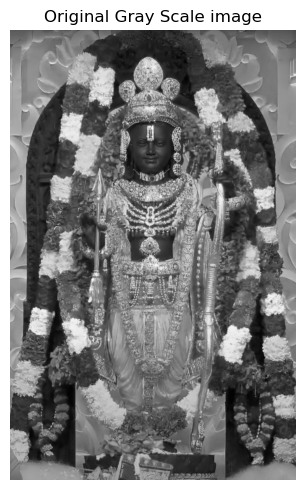

In [6]:
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

In [7]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [8]:
  conv_fn = tf.nn.conv2d
  image_filter = conv_fn(
      input=image,
      filters=kernel,
      strides=1,
      padding='SAME'
  )

In [9]:
plt.figure(figsize=(15, 15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Axes: >

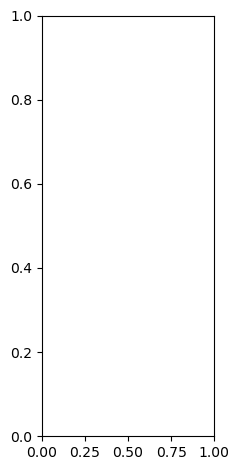

In [10]:
plt.subplot(1, 3, 1)

Text(0.5, 1.0, 'Convolution')

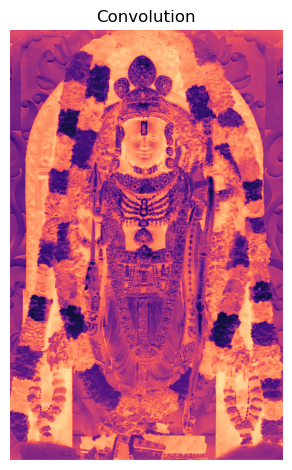

In [11]:
plt.imshow(
    tf.squeeze(image_filter )
)
plt.axis('off')
plt.title('Convolution')

In [12]:
relu_fn = tf.nn.relu
image_detect = relu_fn(image_filter)

Text(0.5, 1.0, 'Activation')

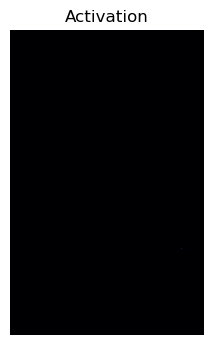

In [13]:
plt.subplot(1, 3, 2)
plt.imshow(
    tf.squeeze(image_detect)
)
plt.axis('off')
plt.title('Activation')

In [ ]:
image_condense = tf.nn.max_pool2d(
    input=tf.reshape(image_detect, (-1, 194, 259, 1)),
    ksize=(2, 2),
    strides=(2, 2),
    padding='SAME'
)